# **SC1015 MINI-PROJECT GROUP 4**

# Install libraries

In [65]:
%pip install scikit-learn
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install lightgbm
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Load the dataset

In [66]:
import pandas as pd

# Load the dataset
heart_failure_df = pd.read_csv('data/heart.csv')

feature_names = heart_failure_df.columns[:-1]
target_col_name = 'HeartDisease'
cat_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

assert len(feature_names) == len(cat_features) + len(num_features) # sanity check

heart_failure_df.head() # display the first few rows of the dataframe

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# **Data Analysis And Visualisation**

### Histogram Visualization Function

In [67]:
from matplotlib import pyplot as plt

def visualiseHistograms(data: pd.DataFrame, visualizableFields = []):
  n = len(visualizableFields)
  n = n // 2 + (n % 2 != 0)

  plt.figure(figsize = (10, 12))

  for idx, value in enumerate(visualizableFields):
    plt.subplot(n, 2, idx+1)
    data[value].hist()
    plt.title(f"{value} Distribution")
    plt.tight_layout(pad=2)

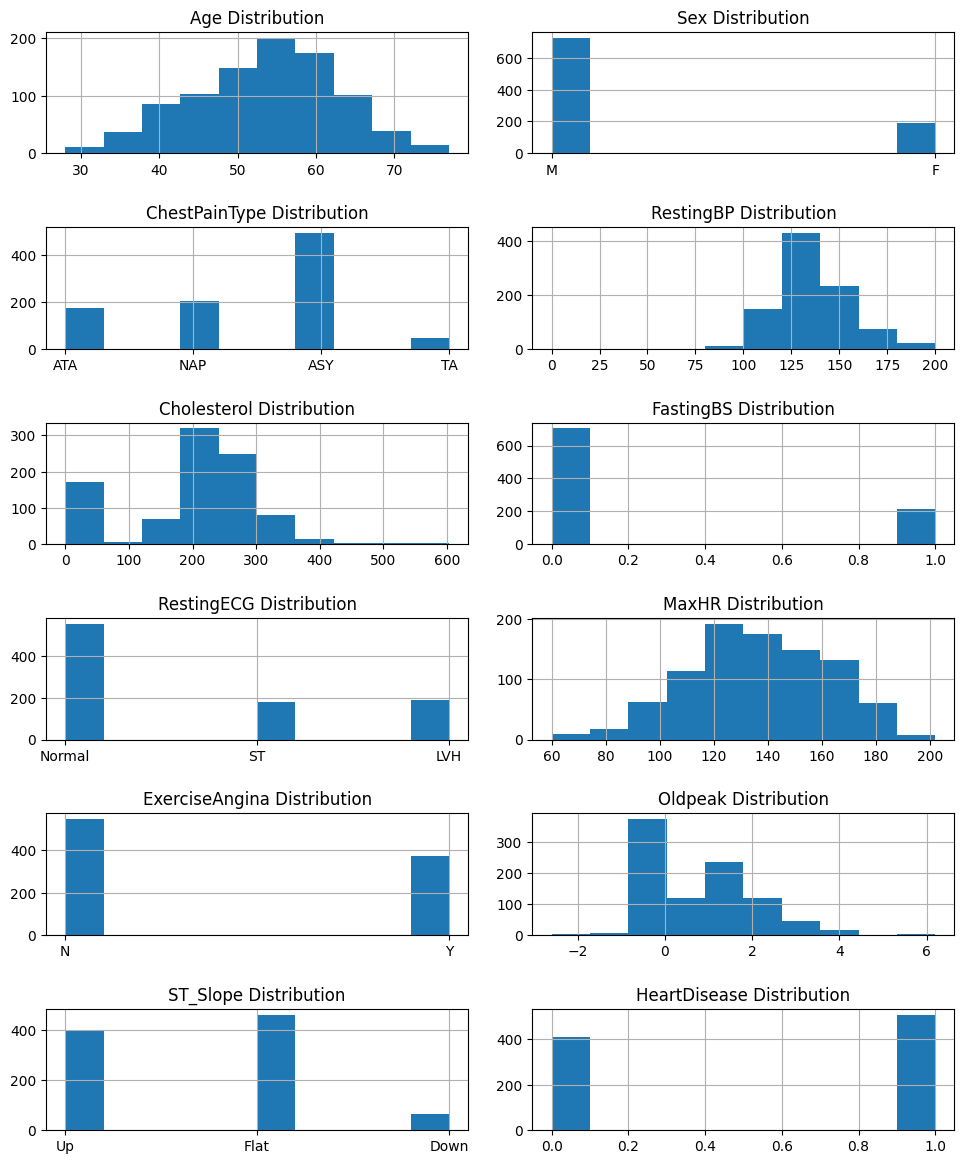

In [68]:
visualiseHistograms(heart_failure_df,heart_failure_df.columns)

In [69]:
import numpy as np

heart_failure_df['Cholesterol'] = np.where(heart_failure_df['Cholesterol'] == 0, np.nan, heart_failure_df['Cholesterol'])
heart_failure_df['RestingBP'] = np.where(heart_failure_df['RestingBP'] == 0, np.nan, heart_failure_df['RestingBP'])
heart_failure_df['FastingBS'] = np.where(heart_failure_df['FastingBS'] == 0, np.nan, heart_failure_df['FastingBS'])

<Axes: xlabel='ChestPainType', ylabel='count'>

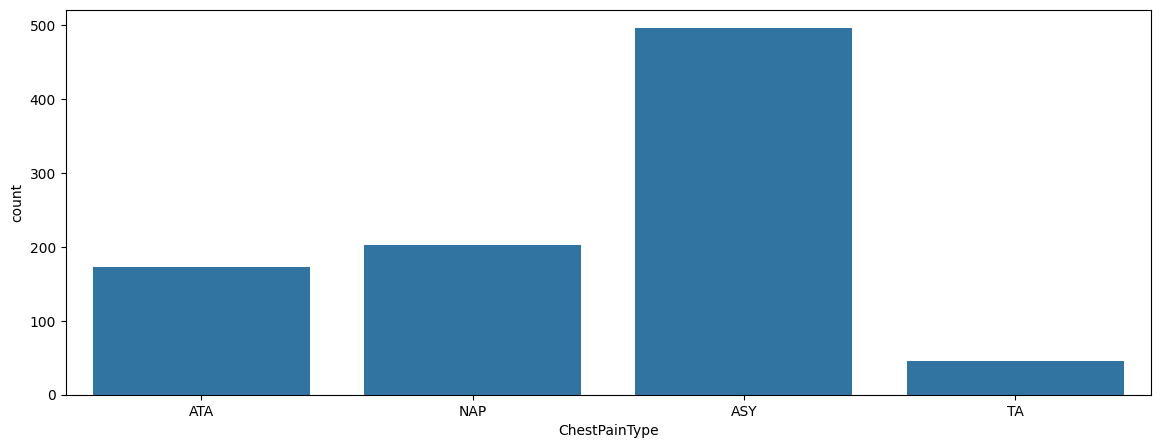

In [70]:
import seaborn as sns

fig = plt.figure(figsize = (14,5))
sns.countplot(x = heart_failure_df['ChestPainType'])

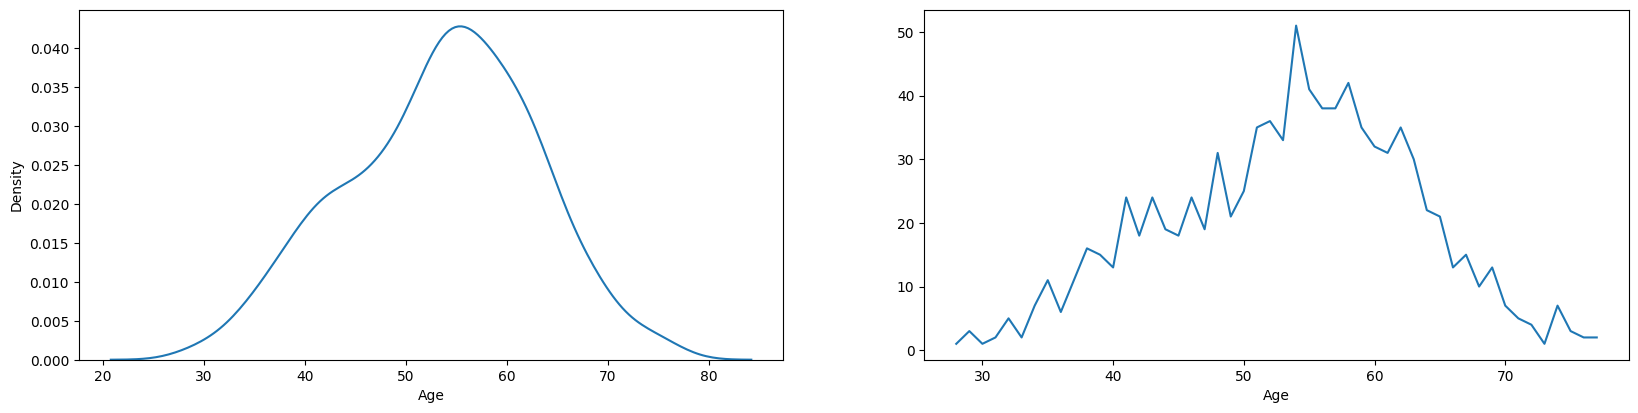

In [71]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(221)
sns.kdeplot(heart_failure_df.Age.dropna())

ax2 = fig.add_subplot(222)
heart_failure_df['Age'].value_counts().sort_index().plot.line()
plt.show()

C:\Users\trung\AppData\Local\Temp\ipykernel_25128\3512098102.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'Age', y = 'Cholesterol', data = heart_failure_df, color = 'r' , shade = False)


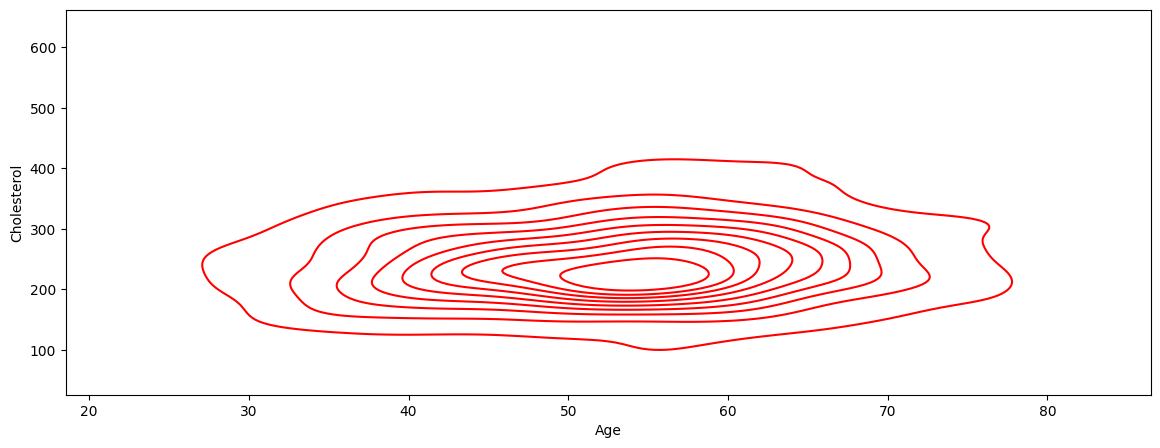

In [72]:
fig = plt.figure(figsize = (14,5))
sns.kdeplot(x = 'Age', y = 'Cholesterol', data = heart_failure_df, color = 'r' , shade = False)
plt.show()

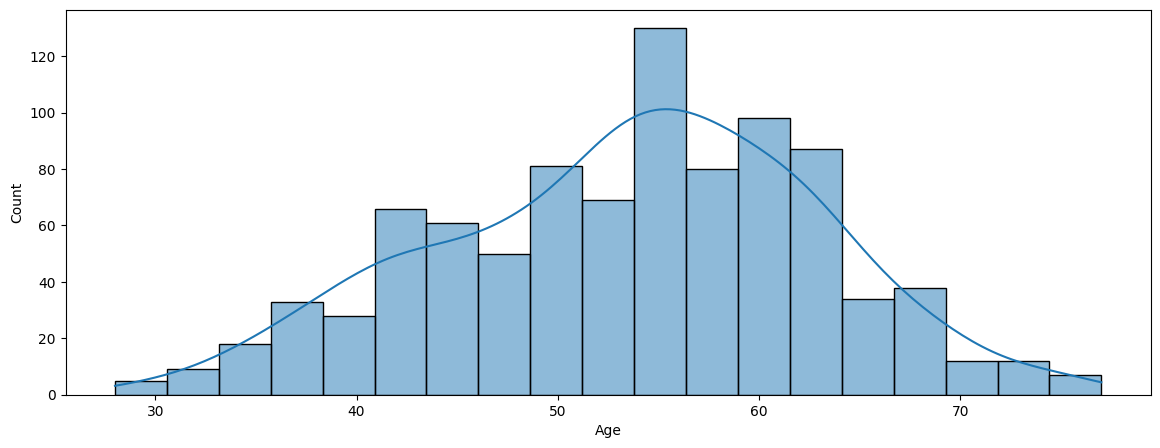

In [73]:
fig = plt.figure(figsize = (14,5))
sns.histplot(heart_failure_df['Age'], kde = True)
plt.show()

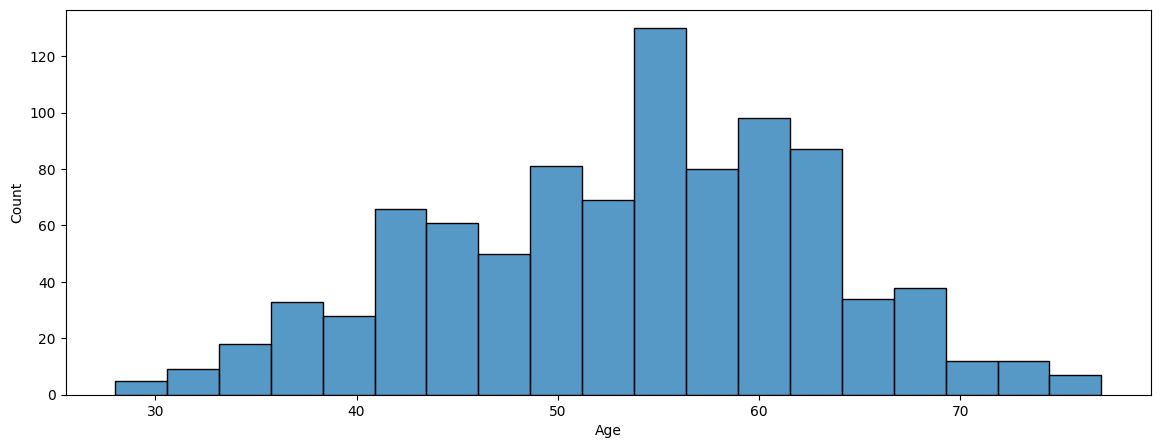

In [74]:
fig = plt.figure(figsize = (14,5))
sns.histplot(heart_failure_df['Age'], kde = False)
plt.show()

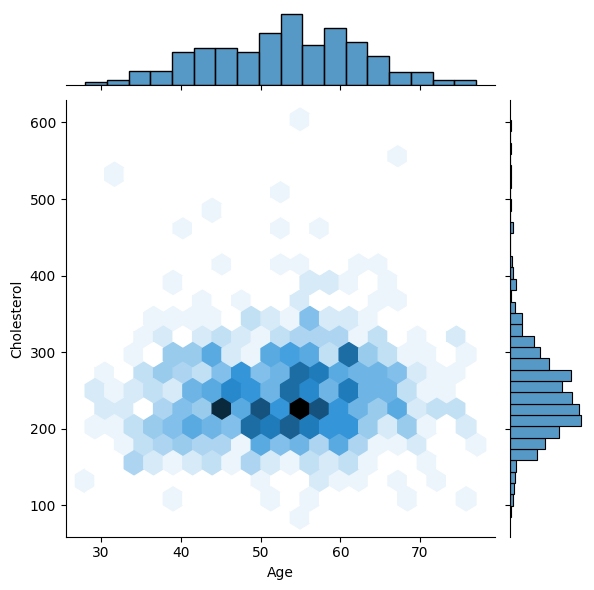

In [75]:
sns.jointplot(x = 'Age', y = 'Cholesterol', data = heart_failure_df, kind = 'hex',gridsize = 20)
plt.show()

<Axes: xlabel='Cholesterol', ylabel='Age'>

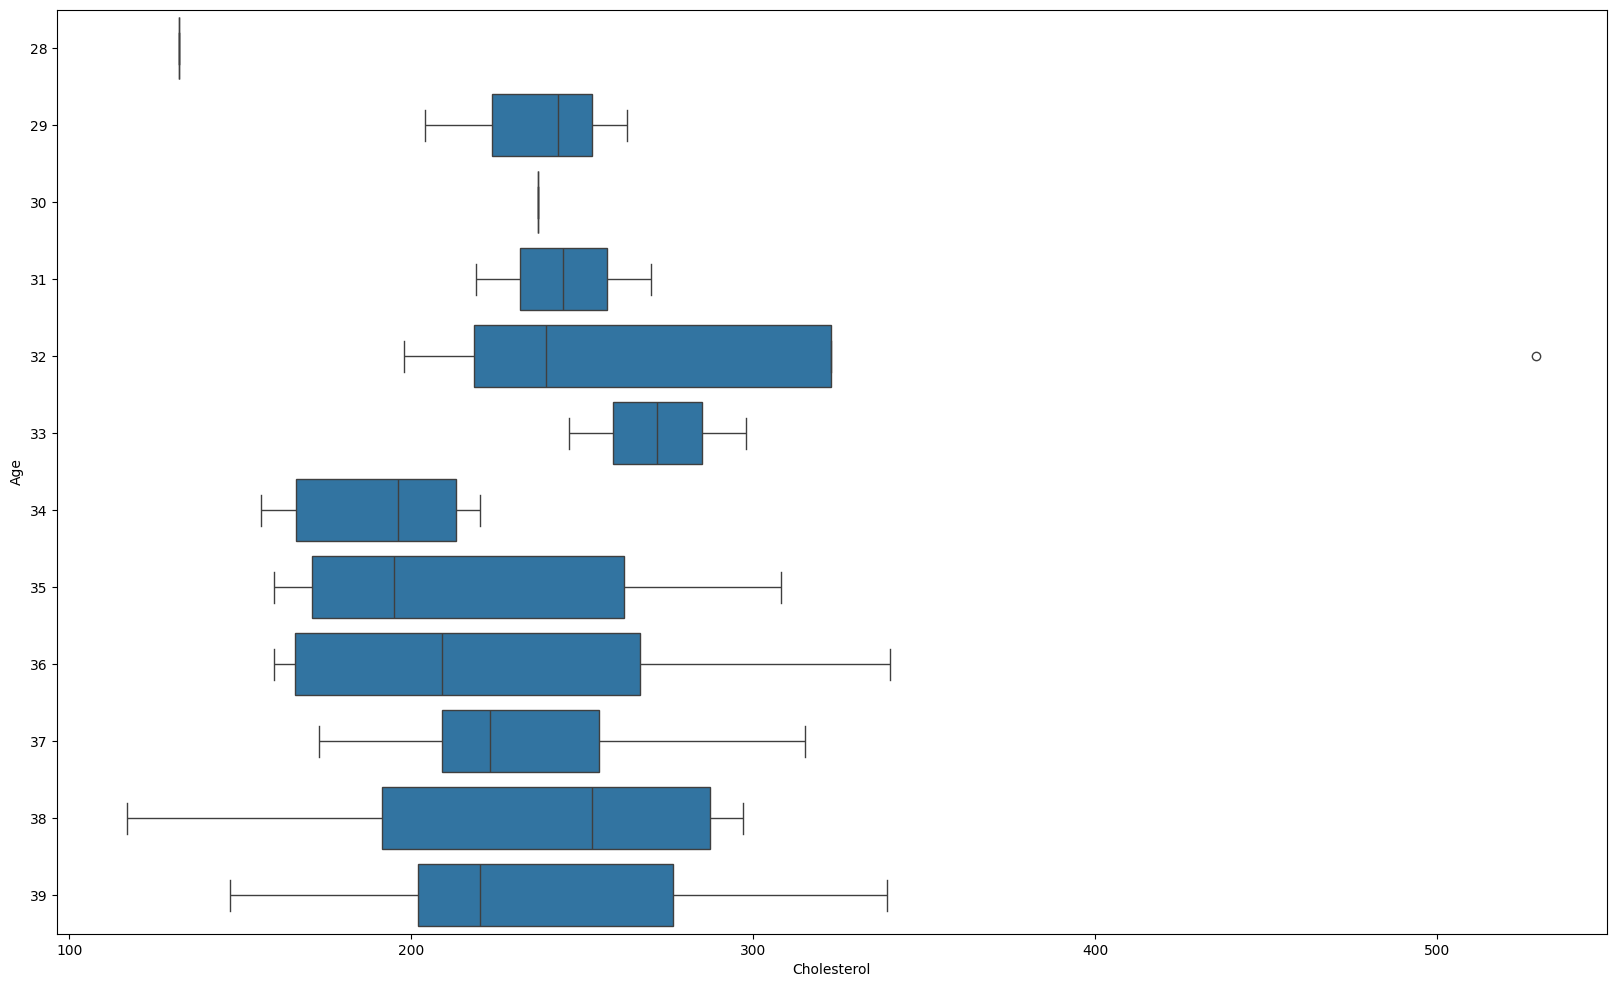

In [76]:
plt.figure(figsize = (20,12))
sns.boxplot(y = 'Age', x = 'Cholesterol', data = heart_failure_df[heart_failure_df.Age.isin(np.arange(20,40,1))],orient = 'h')

<Axes: xlabel='Sex', ylabel='MaxHR'>

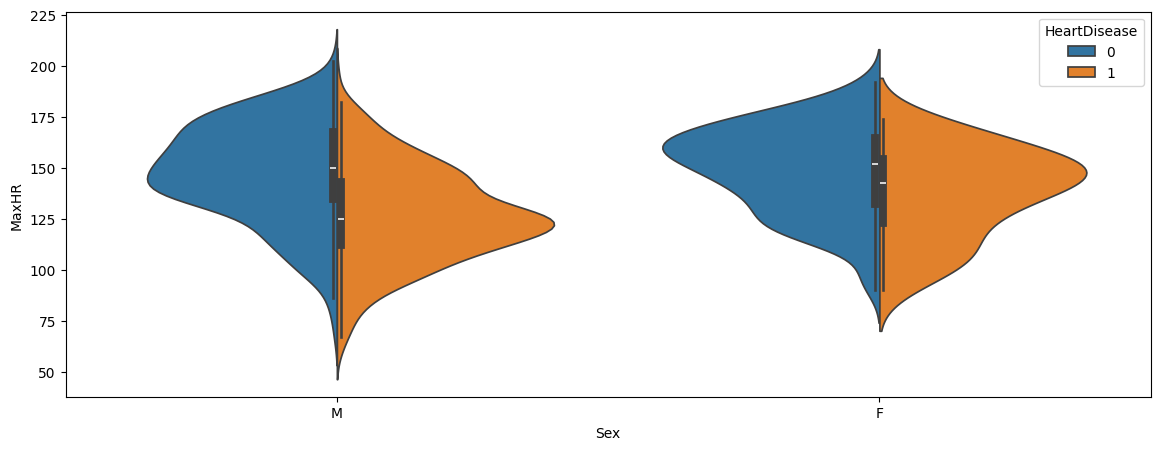

In [77]:
fig = plt.figure(figsize = (14,5))
sns.violinplot(y = 'MaxHR',x = 'Sex', hue = 'HeartDisease', split = True, data = heart_failure_df)

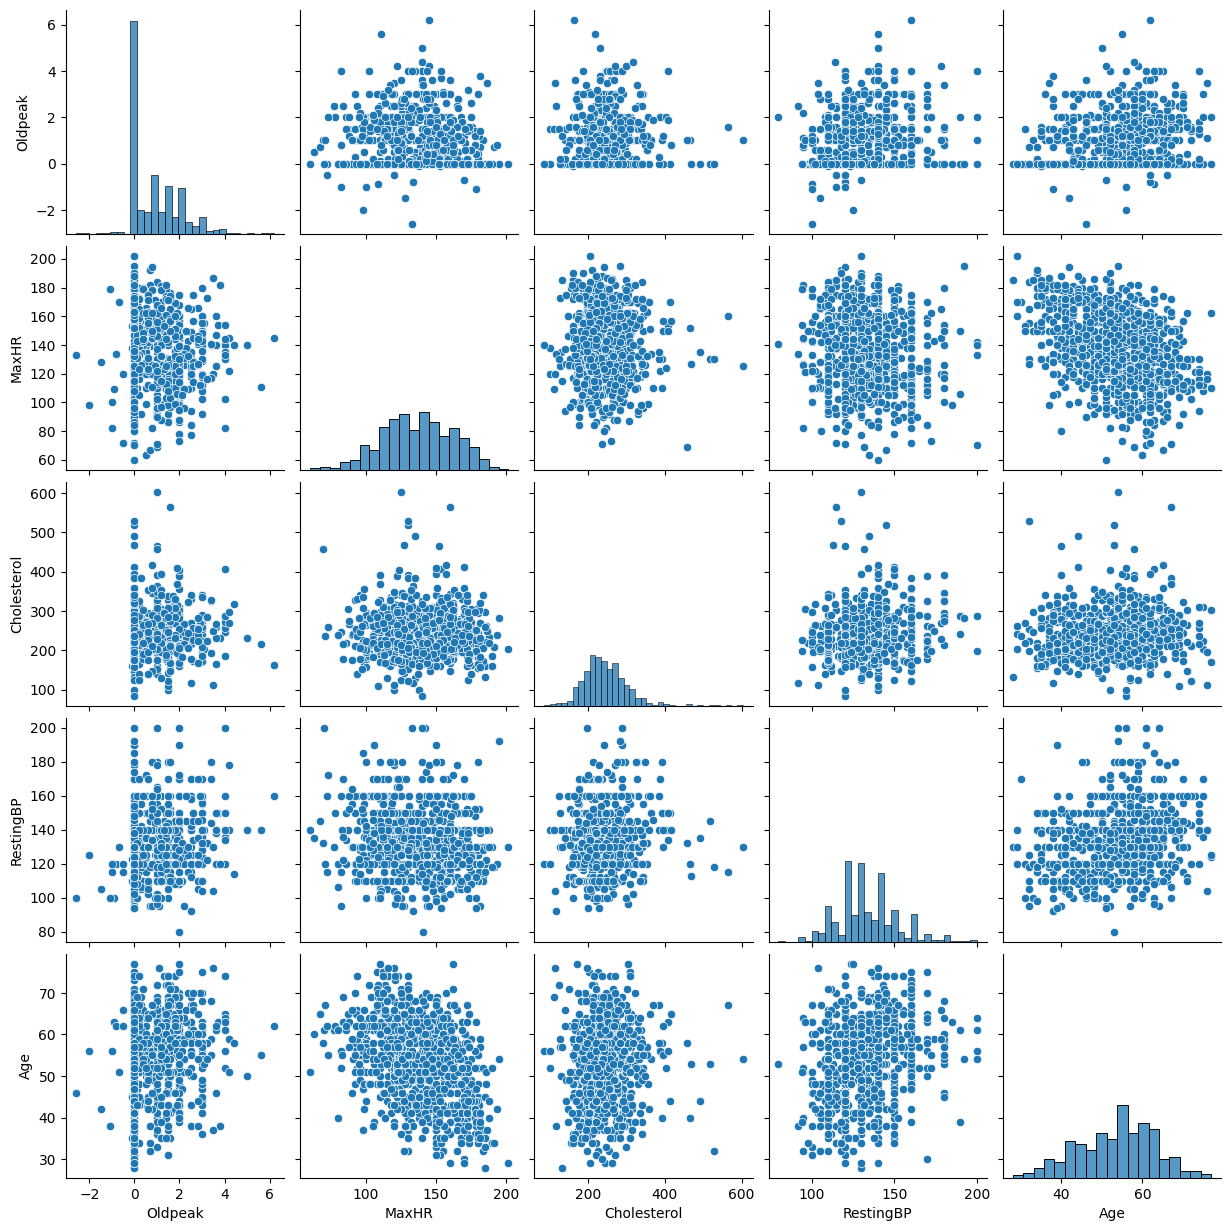

In [78]:
cols = ['Oldpeak', 'MaxHR', 'Cholesterol', 'RestingBP', 'Age']
sns_plot = sns.pairplot(heart_failure_df[cols])

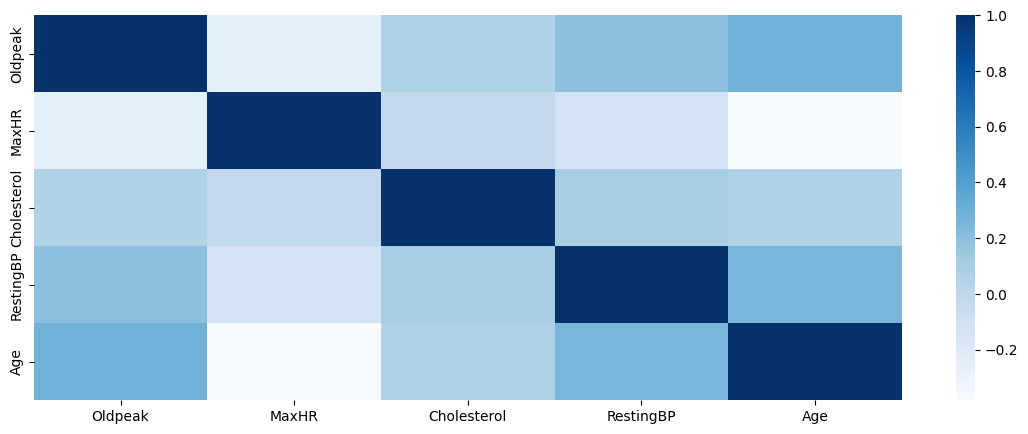

In [79]:
fig = plt.figure(figsize = (14,5))
sns.heatmap(heart_failure_df[cols].dropna().corr(), cmap = 'Blues')
plt.show()

In [80]:
heart_failure_df[cols].dropna().corr()

,Oldpeak,MaxHR,Cholesterol,RestingBP,Age
Oldpeak,1.000000,-0.259533,0.058488,0.198575,0.286006
MaxHR,-0.259533,1.000000,-0.019856,-0.125774,-0.382112
Cholesterol,0.058488,-0.019856,1.000000,0.095939,0.058758
RestingBP,0.198575,-0.125774,0.095939,1.000000,0.259865
Age,0.286006,-0.382112,0.058758,0.259865,1.000000
